## Final Project Report

## Project Title: New York City: Short vs. Long Term Housing Rentals

## Student: Claudia Adam

## Date: 6/13/25
---

In [ ]:
# import pandas to create and manipulate dataframes
import pandas as pd
# import numpy to use math functions
import numpy as np
# import matplotlib and seaborn to create visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the airbnb listings dataset into a dataframe
airbnb = pd.read_csv('AB_NYC_2019.csv')
# print the size, column information, and first five rows of the airbnb dataframe
print("Size of the Airbnb dataset:", airbnb.shape)
print("\n\nInformation of the Airbnb dataset:")
print(airbnb.info())
print("\n\nFirst 5 rows of the Airbnb dataset:")
print(airbnb.head())

Size of the Airbnb dataset: (48895, 16)


Information of the Airbnb dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_review

In [ ]:
# cleaning the airbnb dataset

# go through each row in the dataset
for index, row in airbnb.iterrows():
    # check if the number of reviews is not zero, yet last review or reviews per month value are null
    if row['number_of_reviews'] != 0 and (pd.isnull(row['last_review']) or pd.isnull(row['reviews_per_month'])):
        # if so, drop the column from the data
        airbnb.drop(index, inplace=True)

    # check if the name for the listing is null
    if pd.isnull(row['name']):
        # create a string with the room type and neighborhood value
        # for example, 'entire house in Brooklyn'
        name = str(row['room_type']) + 'in' + row['neighbourhood']
        # set the name of that listing to the one created above
        airbnb.at[index, 'name'] = name


# create a list mapping host names to host ids
hostMap = airbnb.dropna(subset=['host_name']).drop_duplicates('host_id')[['host_id', 'host_name']]
# convert the list into a dictionary
hostMap = dict(zip(host_map['host_id'], host_map['host_name']))
# use the dictionary to map all host ids to host names
# this will fill any null host names values where the host id is present in another listing
airbnb['host_name'] = airbnb.apply(lambda row: hostMap[row['host_id']] if pd.isnull(row['host_name'])
                      and row['host_id'] in hostMap else row['host_name'], axis=1)
# drop any listings will null host name values
airbnb = airbnb.dropna(subset=['host_name'])

# print the updated column information after cleaning
print("Update information on Airbnb dataset after cleaning:")
print(airbnb.info())

Update information on Airbnb dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 48874 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48874 non-null  int64  
 1   name                            48874 non-null  object 
 2   host_id                         48874 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48874 non-null  object 
 5   neighbourhood                   48874 non-null  object 
 6   latitude                        48874 non-null  float64
 7   longitude                       48874 non-null  float64
 8   room_type                       48874 non-null  object 
 9   price                           48874 non-null  int64  
 10  minimum_nights                  48874 non-null  int64  
 11  number_of_reviews               48874 non-nul

In [ ]:
# load the streetEasy rental listings data into a dataframe
rentals = pd.read_csv('manhattan.csv')
# print the size, column information, and first five rows of the rental dataset
print("Size of the Airbnb dataset:", rentals.shape)
print("\n\nInformation of the Airbnb dataset:")
print(rentals.info())
print("\n\nFirst 5 rows of the Airbnb dataset:")
print(rentals.head())

Size of the Airbnb dataset: (3539, 18)


Information of the Airbnb dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym      

# Research Question 1: How does price and availability for Airbnbs in New York City differ across the five boroughs?
---

In [ ]:
# create a table with the average price for each neighborhood group (ny borough)
avgAirbnbPrice = airbnb.groupby('neighbourhood_group')['price'].mean()
# sort the table by descending average rental price
avgAirbnbPrice.sort_values(ascending=False, inplace=True)
# print the result
print("Average Airbnb price per neighborhood:\n", avgAirbnbPrice)

Average Airbnb price per neighborhood:
 neighbourhood_group
Manhattan        196.895853
Brooklyn         124.398009
Staten Island    114.812332
Queens            99.536017
Bronx             87.508257
Name: price, dtype: float64


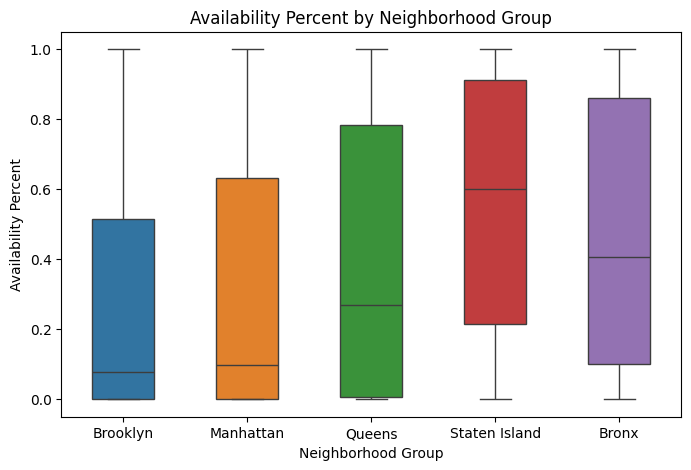

In [ ]:
# create a new column that takes the number of days an airbnb is available and converts it to a percent (for that year)
airbnb['availability_percent'] = airbnb['availability_365'] / 365
# group the availability percent by the neighborhood group
availabilityByNeigh = airbnb.groupby('neighbourhood_group')['availability_percent']

# create a boxplot of the distribution of availability percent for each neighborhood group
# make each bar a different color and decrease the width to make it look nicer
plt.figure(figsize=(8, 5))
sns.boxplot(data=airbnb, x='neighbourhood_group', y='availability_percent', width=0.5, hue='neighbourhood_group')
# title the overall graph and axes accordingly
plt.title('Availability Percent by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Availability Percent')
# call show to make the graph appear when the program is run
plt.show()

# Research Question 2: Which building amenities are statistically significant for predicting average long term rental prices?
---

In [ ]:
# import statsmodels.api to run statistical tests
import statsmodels.api as sm

# create a table with all the data from the independent (x) variables
X = rentals[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
             'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
             'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
# save the dependent (y) variable
y = rentals['rent']

# compute the intercept for the regression
X = sm.add_constant(X)
# run a robust linear regression of the x variables on the rent column
# setting cov_type to HC1 makes the regression robust which eliminates bias in standard error
model = sm.OLS(y, X).fit(cov_type='HC1')
# print the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     348.8
Date:                Sun, 08 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:02:55   Log-Likelihood:                -30869.
No. Observations:                3539   AIC:                         6.177e+04
Df Residuals:                    3524   BIC:                         6.186e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -422.1606    113.993  

# Research Question 3
---

In [ ]:
# create a list of all the common neighborhoods between the two datasets
commonNeighborhoods = rentals['neighborhood'].value_counts().index.intersection(airbnb['neighbourhood'].value_counts().index)
# create a table containning the average rental price and count for each neighborhood in rentals
avgRentalPrice = rentals.groupby('neighborhood')['rent'].agg(rental_avg_price='mean', rental_count='count')
# sort the list by descending average rental price
avgRentalPrice.sort_values(by='rental_avg_price', ascending=False, inplace=True)
# only keep the neighborhoods that overlap with the airbnb dataset
avgRentalPrice = avgRentalPrice.loc[avgRentalPrice.index.isin(commonNeighborhoods)]
# convert average rental price to per day to make it the same unit as airbnb prices
avgRentalPrice['rental_avg_price'] = avgRentalPrice['rental_avg_price'] / 30.437

# create a table containing the average airbnb price and count for each neighborhood in airbnb
avgAirbnbPrice = airbnb.groupby('neighbourhood')['price'].agg(airbnb_avg_price='mean', airbnb_count='count')
# only keep neighborhoods that overlap with the rentals dataset
avgAirbnbPrice = avgAirbnbPrice.loc[avgAirbnbPrice.index.isin(commonNeighborhoods)]

# create a table with the average availability in days for each neighborhood
avgAirbnbAvailability = airbnb.groupby('neighbourhood')['availability_365'].agg(airbnb_avg_availability='mean')
# only keep neighborhoods that overlap with the rentals dataset
avgAirbnbAvailability = avgAirbnbAvailability.loc[avgAirbnbAvailability.index.isin(commonNeighborhoods)]
# add a column that represent availability as a percent of the year
avgAirbnbAvailability['airbnb_percent_availability'] = avgAirbnbAvailability['airbnb_avg_availability'] / 365

# combine all three tables above based on the index (neighborhood)
# now each common neighborhood has values showing average rental price, average airbnb price, number of listings
# from each dataset, availability in days, and percent availability
allInfo = pd.concat([avgRentalPrice, avgAirbnbPrice, avgAirbnbAvailability], axis=1)

# round all values in the table to two places to make it more readable
for col in allInfo.columns:
    allInfo[col] = allInfo[col].round(2)

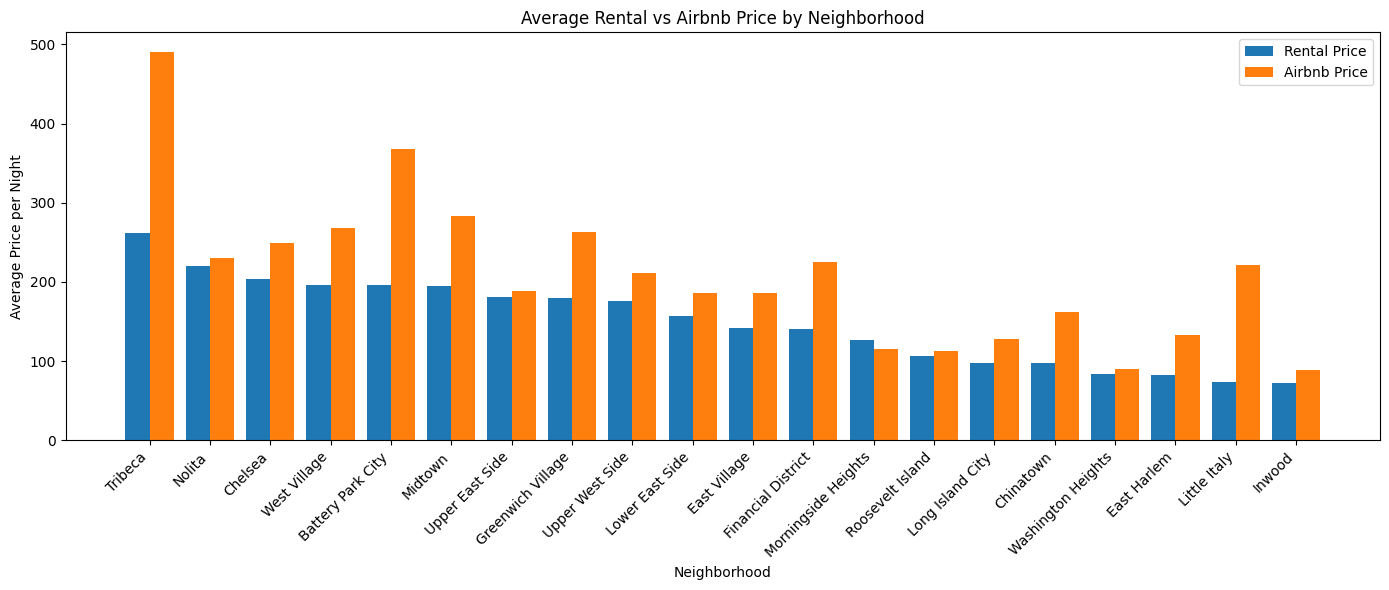

In [ ]:
# reset the index in order to the plot the dataframe
allInfo = allInfo.reset_index()

# set the figure size for the graph
plt.figure(figsize=(14, 6))
# create a bar plot for the average rental price for each neighborhood
# set the bar to the left of each x axis tick
# set the bar width to 0.4 and set the label in the legend to Rental Price
plt.bar(np.arange(20) - 0.2, allInfo['rental_avg_price'], 0.4, label='Rental Price')
# use the sam method as above to create a bar for each average airbnb price
# set the bar to the left of the x axis tick
# set the label for the legend to Airbnb price
plt.bar(np.arange(20) + 0.2, allInfo['airbnb_avg_price'], 0.4, label='Airbnb Price')

# label the overall graph and axes accordingly
plt.xlabel('Neighborhood')
plt.ylabel('Average Price per Night')
plt.title('Average Rental vs Airbnb Price by Neighborhood')
# set the x axis tick labels to the neighborhood name
# rotate the labels so they don't overlap
plt.xticks(np.arange(20), allInfo['index'], rotation=45, ha='right')
# add a legend to show which color bar represents which dataset
plt.legend()
# call tight_layout and show to format the graph and make it appear when the program is run
plt.tight_layout()
plt.show()


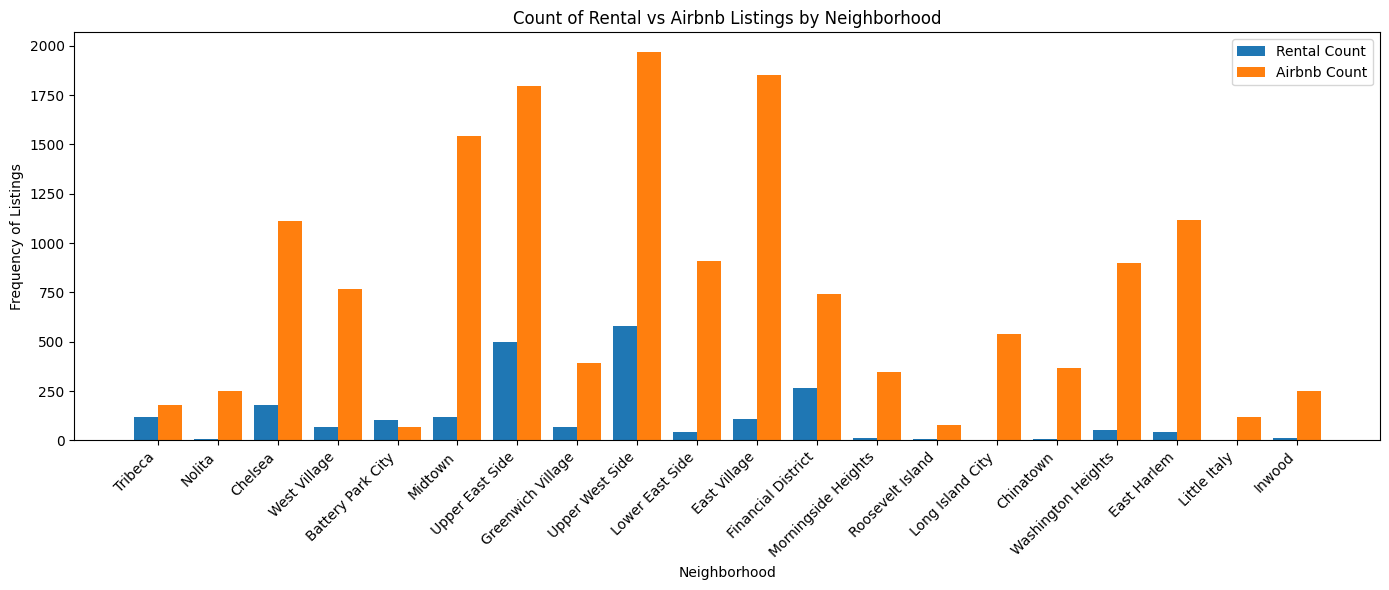

In [ ]:
# using the same method as above, make a dual bar graph for count of listings in each neighborhood
plt.figure(figsize=(14, 6))
# plot a bar for the counts for each dataset
plt.bar(np.arange(20) - 0.2, allInfo['rental_count'], 0.4, label='Rental Count')
plt.bar(np.arange(20) + 0.2, allInfo['airbnb_count'], 0.4, label='Airbnb Count')

# label the overall graph and axes accordingly
plt.xlabel('Neighborhood')
plt.ylabel('Frequency of Listings')
plt.title('Count of Rental vs Airbnb Listings by Neighborhood')
# set the x axis tick labels to the neighborhood name
# rotate the labels so they don't overlap
plt.xticks(np.arange(20), allInfo['index'], rotation=45, ha='right')
# add a legend to show which color bar represents which dataset
plt.legend()
# call tight_layout and show to format the graph and make it appear when the program is run
plt.tight_layout()
plt.show()

In [ ]:
# import pearsonr from scipy.stats to run a pearson correlation test
from scipy.stats import pearsonr
# run a pearson correlation test between average price for rentals and airbnbs
# extract the correlation coefficient and corresponding p-value from the test
corrCoefficient, pValue = pearsonr(allInfo['rental_avg_price'], allInfo['airbnb_avg_price'])
# print the result
# I rounded the results to make them more obvious
print("Pearson correlation coefficient:", round(corrCoefficient, 2))
print("P-value:", round(pValue, 3))


Pearson correlation coefficient: 0.82
P-value: 0.0
